# Markov Chain Monte Carlo and Importance Sampling methods in UQpy

This notebook illustrates the use of the MCMC and IS classes of the SampleMethods module to sample from a distribution, possibly known up to a constant - see **section 3.1.2** in the accompanying paper "UQpy: A general purpose Python package and development environment for uncertainty quantification".  

In [1]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt

The following cell defines the 2D distribution to sample from (it is defined via its log pdf function): the Rosenbrock function.

In [2]:
def log_pdf_target(x, param):
    return -(100*(x[:, 1]-x[:, 0]**2)**2+(1-x[:, 0])**2)/param
args_target = (20, )

### MCMC: Metropolis Hastings algorithm

The proposal density is a bi-variate normal distribution with standard deviation 0.5 and 2. in directions 1 and 2 respectively.

In [3]:
from UQpy.Distributions import Normal, JointInd
proposal = JointInd(marginals=[Normal(scale=0.5), Normal(scale=2.)])

In [4]:
from UQpy.SampleMethods import MH
sampler = MH(log_pdf_target=log_pdf_target, args_target=args_target, dimension=2, nburn=500, jump=100, nchains=1, 
             proposal=proposal, proposal_is_symmetric=True, random_state=123)
sampler.run(nsamples=500)

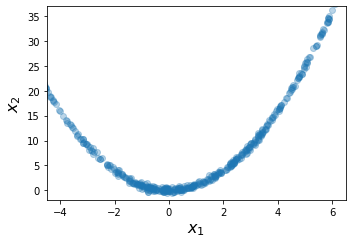

In [5]:
fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(sampler.samples[:,0], sampler.samples[:,1], 'o', alpha=0.3)
ax.set_xlabel('$x_{1}$', fontsize=16)
ax.set_ylabel('$x_{2}$', fontsize=16)
ax.set_xlim([-4.5, 6.5])
ax.set_ylim([-2, 37])
plt.tight_layout()
#plt.savefig('rosenbrock_mcmc.pdf')
plt.show()

### Importance Sampling

The importance (proposal) distribution is a bivariate distribution with independent uniform and gamma marginals.

In [6]:
from UQpy.Distributions import Uniform, Gamma, JointInd
proposal = JointInd(marginals=[Uniform(loc=-4.5, scale=11.), Gamma(a=1.5, loc=-1, scale=8.)])

In [7]:
from UQpy.SampleMethods import IS
sampler = IS(log_pdf_target=log_pdf_target, args_target=args_target, proposal=proposal, random_state=123)
sampler.run(nsamples=4000)

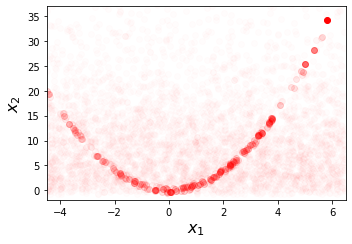

In [8]:
fig, ax = plt.subplots(figsize=(5, 3.5))
minw, maxw = min(sampler.weights), max(sampler.weights)
slope = 0.98 / (maxw-minw)
for s, w in zip(sampler.samples, sampler.weights):
    ax.scatter(s[0], s[1], marker='o', alpha=0.01+slope*(w-minw), color='red')
ax.set_xlabel('$x_{1}$', fontsize=16)
ax.set_ylabel('$x_{2}$', fontsize=16)
ax.set_xlim([-4.5, 6.5])
ax.set_ylim([-2, 37])
plt.tight_layout()
#plt.savefig('rosenbrock_is.pdf')
plt.show()